#### Build Datasets + Fit Models with diff Params
built: 5/2 9:00pm

In [1]:
import os, sys, json, copy, random, datetime
import pandas as pd
import numpy as np

# set to my fork with fix on server
sys.path.insert(0, '../../../myfastai')
# set to dev-head on local
# sys.path.insert(0, '../../../fastaif')

import fastai
print(fastai.__version__)

from fastai.vision import *
from fastai.callbacks import CSVLogger
from fastai.utils.mem import  gpu_mem_get_free_no_cache
from modules.ap3data import build_data, clear_gpu_mem
from modules.miscutils import move_file_obj
gpu_mem_get_free_no_cache()

1.0.53.dev0


7601

In [2]:
data_small = build_data(batch_size=8, 
                        size=(216, 324), 
                        valid_pct=0.2,
                        )
data_large = build_data(batch_size=8, 
                        size=(288, 432), 
                        valid_pct=0.2,
                        )

all validations pass
all validations pass


In [1]:
'''
    5/2, 9:30pm - the "apfit3-X" series
      
    
    common  -  data_large, resnet50, batchsize=8
    learn_1 -  alexnet
    learn_2 -  dense161
    learn_3 -  resnet101, constant, low lr
    learn_4 -  resnet101, slice lr

'''
pass

##### Build & Fit Models - don't touch this subsequently, we can see history here

In [3]:
gpu_mem_get_free_no_cache()

7601

In [4]:
model_fn = 'apfit3-1'
lr0, lr1 = 2e-4, 2e-3

learn_1 = cnn_learner(data_large, models.alexnet)

cb = CSVLogger(learn_1,filename = model_fn)

learn_1.fit_one_cycle(10, slice(lr0, lr1), callbacks=[cb])

learn_1.save(model_fn)

clear_gpu_mem(learn_1)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/jupyter/.torch/models/alexnet-owt-4df8aa71.pth
244418560it [00:10, 23512651.13it/s]


epoch,train_loss,valid_loss,time
0,0.572306,0.116966,01:19
1,0.068349,0.040239,01:12
2,0.053265,0.032237,01:13
3,0.049468,0.031699,01:12
4,0.045299,0.025790,01:12
5,0.040420,0.026455,01:15
6,0.039811,0.022715,01:14
7,0.037403,0.026072,01:11
8,0.037974,0.025636,01:12
9,0.039824,0.025351,01:15


7108
this Learner object self-destroyed - it still exists, but no longer usable
7140


In [6]:
from fastai.callbacks import SaveModelCallback

model_fn = 'apfit3-2b'
lr0, lr1 = 2e-4, 2e-3

learn_2 = cnn_learner(data_large, models.densenet161)

smc = SaveModelCallback(learn_2, every='epoch', monitor='valid_loss'
                       ,name='apfit3-2b-smc')

cb = CSVLogger(learn_2,filename = model_fn)

learn_2.fit_one_cycle(10, slice(lr0, lr1), callbacks=[cb, smc])

learn_2.save(model_fn)

clear_gpu_mem(learn_2)

epoch,train_loss,valid_loss,time
0,0.572516,0.161245,04:53
1,0.067257,0.036533,04:53
2,0.033651,0.018509,04:53
3,0.024167,0.011668,04:53
4,0.020208,0.006934,04:53
5,0.015705,0.005433,04:53
6,0.015004,0.006886,04:53
7,0.013134,0.009710,04:53
8,0.013030,0.006854,04:53
9,0.013303,0.006249,04:53


6185
this Learner object self-destroyed - it still exists, but no longer usable
6347


In [4]:
model_fn = 'apfit3-2'
lr0, lr1 = 2e-4, 2e-3

learn_2 = cnn_learner(data_large, models.densenet161)

cb = CSVLogger(learn_2,filename = model_fn)

learn_2.fit_one_cycle(10, slice(lr0, lr1), callbacks=[cb])

learn_2.save(model_fn)

clear_gpu_mem(learn_2)

epoch,train_loss,valid_loss,time
0,0.578800,0.172196,05:16
1,0.065443,0.033308,04:54
2,0.036522,0.018286,04:54
3,0.021763,0.009379,04:54
4,0.018672,0.007602,04:53
5,0.017699,0.007080,04:52
6,0.015382,0.005751,04:53
7,0.012129,0.122531,04:53
8,0.012489,0.014308,04:52
9,0.012974,0.007137,04:52


6966
this Learner object self-destroyed - it still exists, but no longer usable
7130


In [6]:
model_fn = 'apfit3-3'

lr = 2e-4

learn_3 = cnn_learner(data_large, models.resnet101)

cb = CSVLogger(learn_3,filename = model_fn)

learn_3.fit_one_cycle(10, slice(lr), callbacks=[cb])

learn_3.save(model_fn)

clear_gpu_mem(learn_3)

epoch,train_loss,valid_loss,time
0,1.170546,24.065495,03:21
1,0.782981,41.290771,03:17
2,0.427265,7.064484,03:17
3,0.205897,3.990131,03:17
4,0.113894,0.785430,03:17
5,0.074343,6.495897,03:17
6,0.055372,0.357467,03:24


KeyboardInterrupt: 

In [7]:
clear_gpu_mem(learn_3)

5803
this Learner object self-destroyed - it still exists, but no longer usable
5803


In [3]:
model_fn = 'apfit3-4'
# lr0, lr1 = 2e-5, 2e-4
lr = 1e-6

learn_4 = cnn_learner(data_large, models.resnet101)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


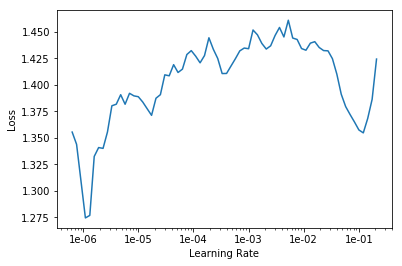

In [4]:
learn_4.lr_find()
learn_4.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


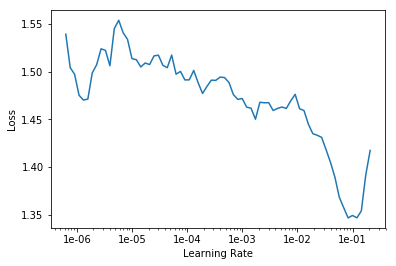

In [5]:
learn_4.lr_find()
learn_4.recorder.plot()

In [ ]:
lr = 1e-6

cb = CSVLogger(learn_4,filename = model_fn)

learn_4.fit_one_cycle(5, lr, callbacks=[cb])

learn_4.save(model_fn)

clear_gpu_mem(learn_4)

epoch,train_loss,valid_loss,time
0,1.457106,326.357117,03:17
1,1.418929,154.350235,03:17
2,1.393387,48.112339,03:17
3,1.348517,905.332703,03:17


In [ ]:
model_fn = 'apfit3-5'
# lr0, lr1 = 2e-5, 2e-4
lr = 1e-3

learn_5 = cnn_learner(data_large, models.resnet101)

cb = CSVLogger(learn_5,filename = model_fn)

learn_5.fit_one_cycle(5, lr, callbacks=[cb])

learn_5.save(model_fn)

clear_gpu_mem(learn_5)